<a href="https://colab.research.google.com/github/Wuthichat/Lab_python/blob/main/Lab_5_BER_NRZL_MF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

shape of n_t: (150,)
shape of z_t: (159,)
arange Nbits: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


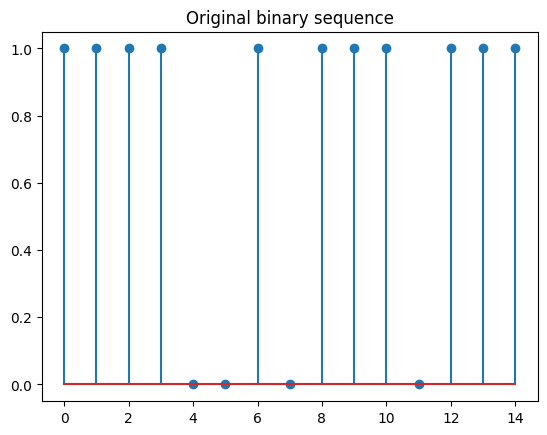

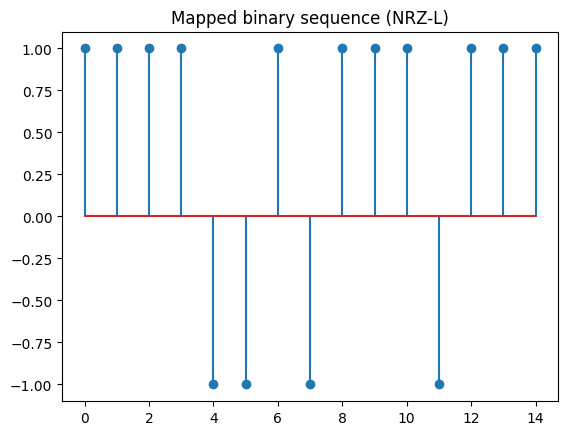

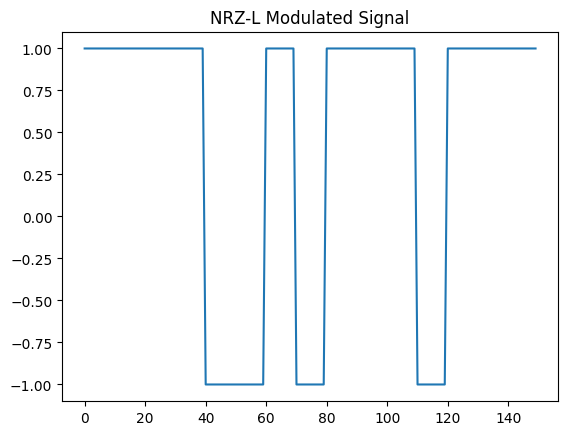

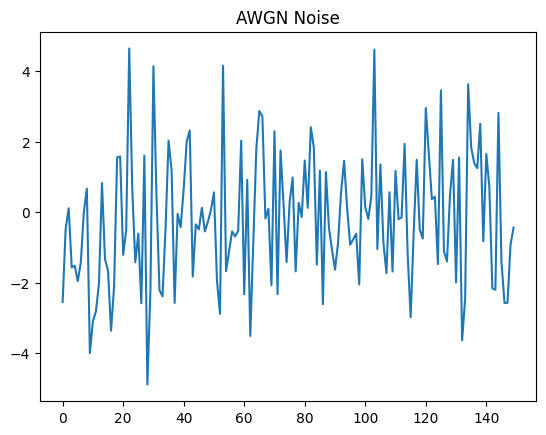

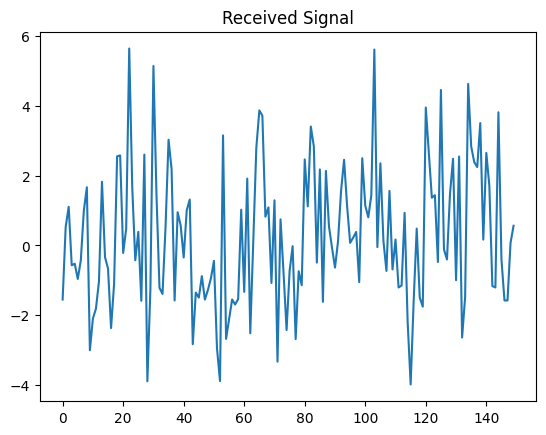

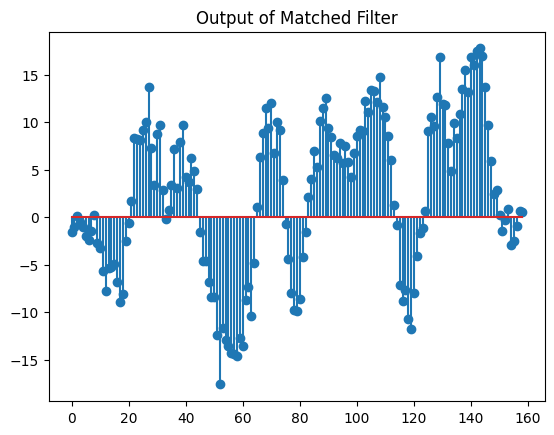

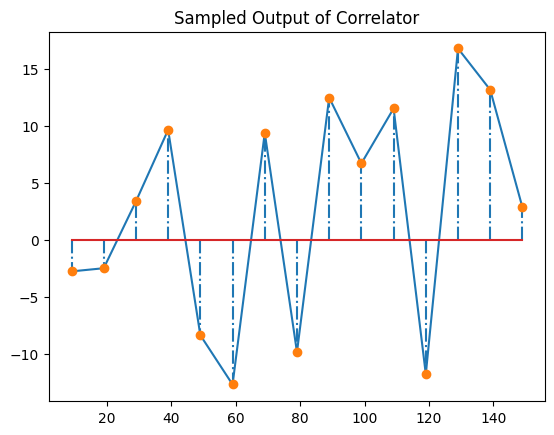

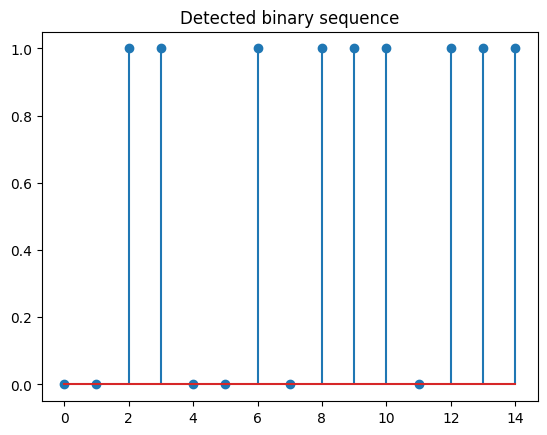

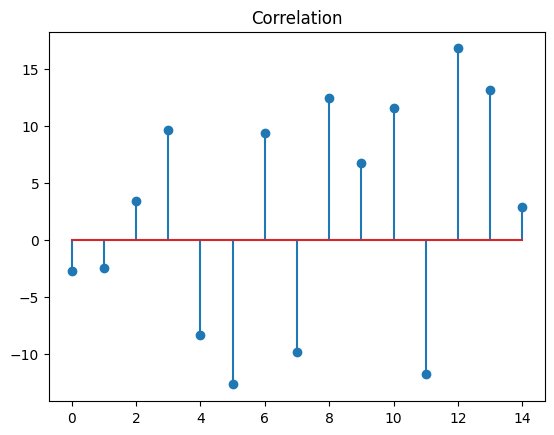

SNR(dB.) =  3.979400086720376
err_num = 2


In [6]:
#Lab 5 Part 2 (31/jul/2024)

import numpy as np
import matplotlib.pyplot as plot

# Parameters
Nbits = 15
Nsamp = 10
np.random.seed(30)

# Generate the original binary sequence
a = np.random.randint(0, 2, Nbits)
b = 2 * a - 1

plot.figure(0)
plot.stem(a)
plot.title("Original binary sequence")

plot.figure(1)
plot.stem(b)
plot.title("Mapped binary sequence (NRZ-L)")

# Generate NRZ-L Modulated signals
x_t = []
for i in range(Nbits):
    if a[i] == 1:
        x_t.extend([1] * Nsamp)
    else:
        x_t.extend([-1] * Nsamp)

plot.figure(2)
plot.plot(x_t)
plot.title("NRZ-L Modulated Signal")

# Generate AWGN
mu = 0
sigma = 2
n_t = np.random.normal(mu, sigma, Nbits * Nsamp)
print("shape of n_t:", np.shape(n_t))
plot.figure(3)
plot.plot(n_t)
plot.title("AWGN Noise")

# Received signals
r_t = x_t + n_t
plot.figure(4)
plot.plot(r_t)
plot.title("Received Signal")

# Matched filter (MF)
s_NRZL = np.array([1,1,1,1,1,1,1,1,1,1])
#s_Manchester = ....

z_t = np.convolve(r_t, s_NRZL)
#z_t = np.convolve(r,s_Manchester)

'''
plot.figure(5)
plot.plot(z_t)
plot.title("Output of Matched Filter")
'''

plot.figure(5)
plot.stem(z_t)
plot.title("Output of Matched Filter")

#A/D
z = [ ]
for i in range(Nbits):
  zz = z_t[i*Nsamp+9]
  z.append(zz)

print("shape of z_t:", np.shape(z_t))
print("arange Nbits:", np.arange(Nbits))
plot.figure(6)
plot.plot(np.arange(Nbits) * Nsamp + (Nsamp - 1), z)
plot.stem(np.arange(Nbits) * Nsamp + (Nsamp - 1), z, '-.')
plot.title("Sampled Output of Correlator")

# Make decision, compare z with 0
a_hat = []
for zdata in z:
    if zdata > 0:
        a_hat.append(1)
    else:
        a_hat.append(0)

# Compute error numbers
err_num = sum(a != a_hat)

plot.figure(7)
plot.stem(a_hat)
plot.title("Detected binary sequence")

# Calculate correlation measure
Corr_A = []
for i in range(Nbits):
    segment_sum = np.sum(r_t[i * Nsamp : (i + 1) * Nsamp])
    Corr_A.append(segment_sum)

plot.figure(8)
plot.stem(Corr_A)
plot.title("Correlation")
plot.show()

SNR_dB = 10 * np.log10(Nsamp / sigma**2)
print("SNR(dB.) = ", SNR_dB)
print('err_num =', err_num)
